In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
# load
with open('bigVocabCountVec_trained_PCA_2021-07-12.pickle', 'rb') as f:
    pca = pickle.load(f)
with open('bigVocabCountVec_trained_TLDA_2021-07-12.pickle', 'rb') as f:
    tlda = pickle.load(f)
id_map = np.load('bigVocabCountVec_id-word-map_2021-07-12.npy')
whitened_tweet_mat = np.load('bigVocabCountVec_whitened_tweet_mat_2021-07-12.npy')

In [4]:
def extract_topics(tlda, pca, id_map, whitened_tweet_mat, top_n_words=20, beta_0=.003):
    tlda.factors_ = pca.reverse_transform(tlda.factors_)  # unwhiten the eigenvectors to get unscaled word-level factors

    ''' 
    Recover alpha_hat from the eigenvalues of M3
    '''  
    
    eig_vals = [np.linalg.norm(k,3) for k in tlda.factors_ ]
    # normalize beta
    alpha      = np.power(eig_vals, -2)
    
    alpha_norm = (alpha / alpha.sum()) * beta_0
    tlda.alpha_   = alpha_norm
            
    tlda.predict(whitened_tweet_mat,w_mat=True,doc_predict=False)  # normalize the factors 
    

    # extract topics and correct weights
    probs = tlda.factors_
    total_topics = probs.shape[0]

    probmaps = []
    for i in range(total_topics):
        topids = probs[i,:].argsort()[-top_n_words:]
        probmaps.append({id_map[word_id]: probs[i,word_id] for word_id in topids})


    return probmaps


In [5]:
probas = pca.reverse_transform(tlda.factors_)

In [6]:
probmaps = extract_topics(tlda, pca, id_map, whitened_tweet_mat)

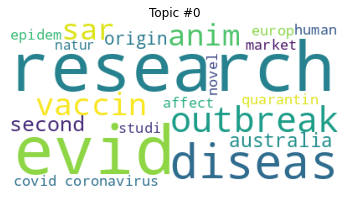

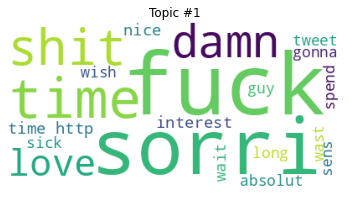

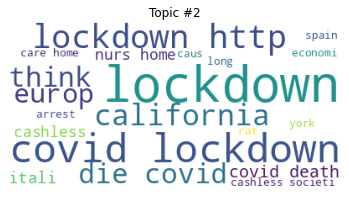

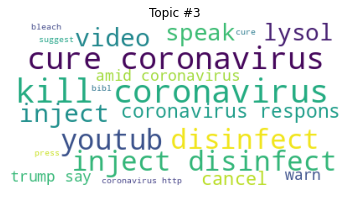

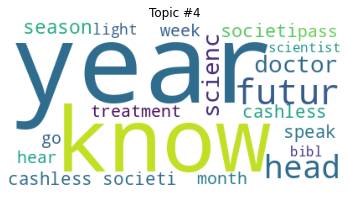

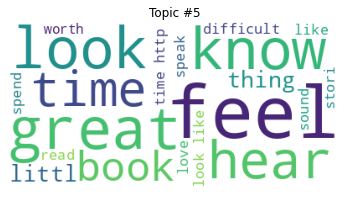

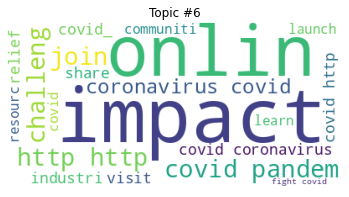

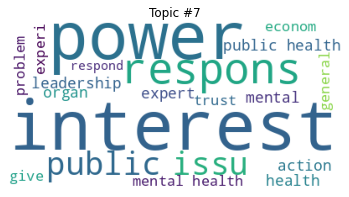

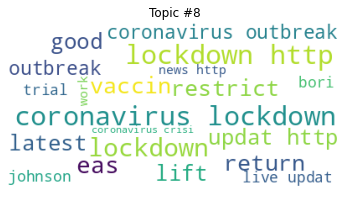

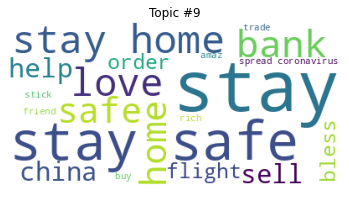

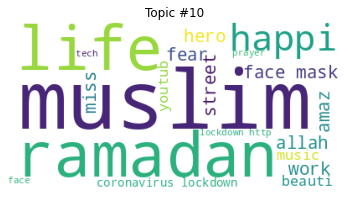

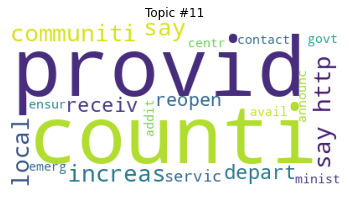

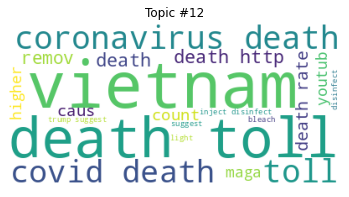

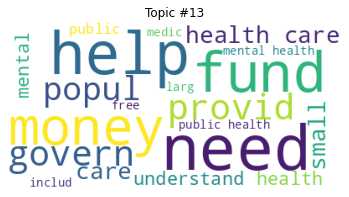

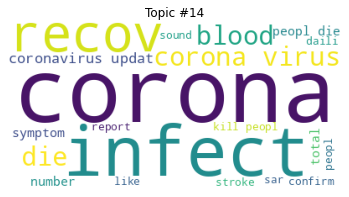

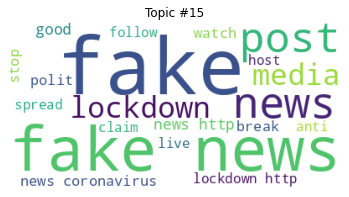

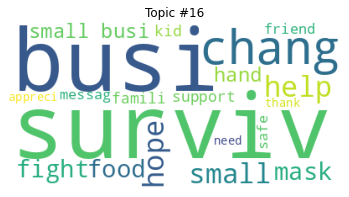

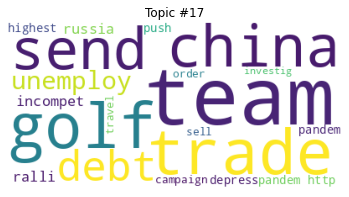

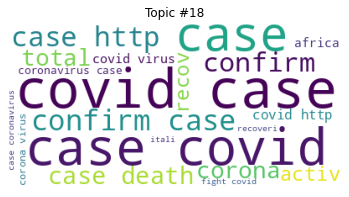

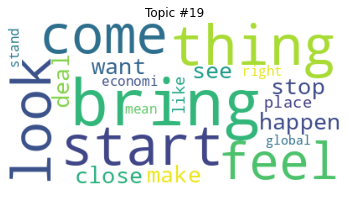

In [9]:
# draw word clouds
# fig, axs = plt.subplots(1, 3, figsize=(9, 3))
total_topics = len(probmaps)
for t in range(total_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color='white').fit_words(probmaps[t]))
    plt.axis("off")
    plt.title("Topic #" + str(t))

In [ ]:
# plot toxicity rating(?) of each topic... there's no easily accessible hate speech lexicon!!!!